In [1]:
import numpy as np
import pandas as pd
import os
import cv2

In [2]:
import random

In [3]:
def Data_Pre_Processing(DATA_DIR,CATEGORIES):
    training_data=[]
    IMG_SIZE=200
    def create_training_data():
        for category in CATEGORIES:
            path=os.path.join(DATA_DIR,category) #path to cats and dogs
            class_num=CATEGORIES.index(category)
            for img in os.listdir(path):
                try:
                    img_arr=cv2.imread(os.path.join(path,img))
                    img_arr=cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                    new_array=cv2.resize(img_arr,(IMG_SIZE,IMG_SIZE))
                    training_data.append([new_array,class_num])
                except Exception as e:
                    pass
        
    create_training_data()
    random.shuffle(training_data)
    
    X=[]
    y=[]

    for features,label in training_data:
        X.append(features)
        y.append(label)


    X=np.array(X).reshape(-1,IMG_SIZE,IMG_SIZE,3)


    return X,y

In [4]:
dirname = os.getcwd()
imges_folder = "images"  
DATA_DIR = dirname +"\\"+imges_folder
print(DATA_DIR)

D:\A.H\Python\Fiver_X-ray\images


In [5]:
categories = ['benign','malignant','non-nodule']

In [6]:
X,y = Data_Pre_Processing(DATA_DIR,categories)

In [7]:
len(X)

7365

In [8]:
for i in range(5):
    print(y[i])

1
1
2
1
1


In [9]:
input_shape = (200, 200, 3)

In [10]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.models import Model
import tensorflow.keras

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers

In [12]:
X_train_multi=X[:6965]
X_test_multi=X[6965:]
y_train_multi=y[:6965]
y_test_multi=y[6965:]

In [13]:
len(X_train_multi)

6965

In [14]:
len(X_test_multi)

400

In [15]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = vgg.layers[-1].output
output =tensorflow.keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

# vgg_model.trainable = False
# for layer in vgg_model.layers:
#     layer.trainable = False

In [16]:
vgg_model.trainable = True

set_trainable = False
for layer in vgg_model.layers:
    if layer.name in ['block5_conv1', 'block4_conv1']:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [17]:
multi_model = Sequential()
multi_model.add(vgg_model)
multi_model.add(Dense(512, activation='relu', input_dim=input_shape))
multi_model.add(Dropout(0.3))
multi_model.add(Dense(512, activation='relu'))
multi_model.add(Dropout(0.3))
multi_model.add(Dense(3, activation='softmax'))

multi_model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])
              
multi_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Model)                (None, 18432)             14714688  
_________________________________________________________________
dense (Dense)                (None, 512)               9437696   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 24,416,579
Trainable params: 22,681,091
Non-trainable params: 1,735,488
____________________________________

In [18]:
history = multi_model.fit(X_train_multi,np.array(y_train_multi),epochs=10,
                              validation_split=0.2)

Train on 5572 samples, validate on 1393 samples
Epoch 1/10
5572/5572 [==============================] - 1577s 283ms/sample - loss: 1.6254 - accuracy: 0.3911 - val_loss: 1.0085 - val_accuracy: 0.4860
Epoch 2/10
5572/5572 [==============================] - 1577s 283ms/sample - loss: 0.9652 - accuracy: 0.5196 - val_loss: 0.8587 - val_accuracy: 0.5836
Epoch 3/10
5572/5572 [==============================] - 1575s 283ms/sample - loss: 0.7963 - accuracy: 0.6387 - val_loss: 0.8579 - val_accuracy: 0.6102
Epoch 4/10
5572/5572 [==============================] - 1571s 282ms/sample - loss: 0.6416 - accuracy: 0.7157 - val_loss: 0.6705 - val_accuracy: 0.6892
Epoch 5/10
5572/5572 [==============================] - 1572s 282ms/sample - loss: 0.4752 - accuracy: 0.8053 - val_loss: 0.5889 - val_accuracy: 0.7430
Epoch 6/10
5572/5572 [==============================] - 3586s 644ms/sample - loss: 0.3317 - accuracy: 0.8758 - val_loss: 0.4870 - val_accuracy: 0.8069
Epoch 7/10
5572/5572 [========================

In [19]:
import h5py

In [20]:
multi_model.save("multi_model.h5")

In [21]:
history.history

{'loss': [1.625365051192854,
  0.965166056789431,
  0.7963351701885697,
  0.6415768839092625,
  0.47517201807202836,
  0.33167432968512084,
  0.2298739261454545,
  0.13739870500410536,
  0.09619006321131006,
  0.06271730619537018],
 'accuracy': [0.39106247,
  0.5195621,
  0.63872933,
  0.7157215,
  0.8052764,
  0.8758076,
  0.91564965,
  0.95100504,
  0.96661884,
  0.980079],
 'val_loss': [1.0084933931675217,
  0.8587054334693218,
  0.857878712510686,
  0.6704948069547803,
  0.5888740035243284,
  0.48698797567405894,
  0.32036035461384704,
  0.4599316322324264,
  0.2640661089778032,
  0.32507382379276495],
 'val_accuracy': [0.48600143,
  0.58363247,
  0.61019385,
  0.6891601,
  0.74300075,
  0.8068916,
  0.8729361,
  0.8492462,
  0.9073941,
  0.89160085]}

In [22]:
import matplotlib.pyplot as plt

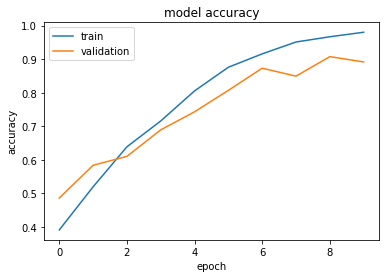

In [23]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [24]:
results=multi_model.evaluate(X_test_multi,np.array(y_test_multi))
print("test loss","test acc:",results)

400/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test loss test acc: [0.3587854669988155, 0.8925]


In [25]:
import pickle


In [26]:
pickle_out = open("X_train_multi","wb")
pickle.dump(X_train_multi,pickle_out)
pickle_out.close()

In [27]:
pickle_out = open("y_train_multi","wb")
pickle.dump(y_train_multi,pickle_out)
pickle_out.close()

In [28]:
pickle_out = open("X_test_multi","wb")
pickle.dump(X_test_multi,pickle_out)
pickle_out.close()

In [29]:
pickle_out = open("y_test_multi","wb")
pickle.dump(y_test_multi,pickle_out)
pickle_out.close()

In [ ]:
import requests
from PIL import Image
import urllib
import numpy as np
import tensorflow as tf
import h5py
import cv2

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('model.h5',compile=False)

In [ ]:
img_arr= cv2.imread("dog-1210559__340.jpg")
img =cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)

In [ ]:
IMG_SIZE=200
new_array=cv2.resize(img,(IMG_SIZE,IMG_SIZE))

In [ ]:
image = np.expand_dims(new_array, axis=0)
#model_input = np.array([new_array])

In [ ]:
prediction = model.predict([image])

In [ ]:
prediction

In [ ]:
prediction[0][0]

In [ ]:
X.shape

In [ ]:
img_arr=cv2.imread(os.path.join(path,img))
                    img_arr=cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB)
                    